In [1]:
import pandas as pd
from datetime import datetime
from prophet import Prophet
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [2]:
# Read the data
df = pd.read_csv("Binance Coin - Historic data.csv")
df['Date']= pd.to_datetime(df['Date'])

df = df[(df["Date"].dt.year == 2021)]
df.set_index("Date", inplace=True)
df=df.sort_index()

# Set-up prophet model
df_prophet = pd.DataFrame()
df_prophet['y'] = df['Price(in dollars)']
df_prophet['Open'] = df['Open']
df_prophet['High'] = df['High']
df_prophet['Low'] = df['Low']
df_prophet['Change%'] = df['Change%']
df_prophet['ds'] = df.index

#Slice train and test set
df_train= df_prophet.head(180).copy()
df_test= df_prophet.tail(27).copy()

m = Prophet()
# m = Prophet(weekly_seasonality=False) # Remove weekly seasonality
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_regressor('Open')
# m.add_regressor('High')
# m.add_regressor('Low')
# m.add_regressor('Change%')

#Train the model on training data
m.fit(df_train)

#Test the model on test data
forecast = m.predict(df_test.drop(columns="y"))

Text(0, 0.5, 'Average Price of BNB coin')

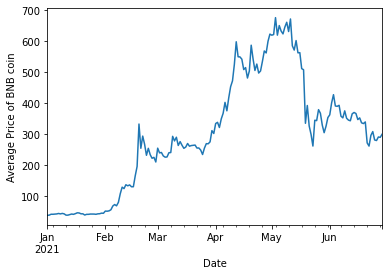

In [8]:
df_train['y'].plot()
plt.ylabel("Average Price of BNB coin")

In [5]:



#Visualization
# Save the Dataframe
output_df=pd.DataFrame(data=forecast['yhat'].values, index=df_test.index, columns=['Predicted Coin Value'])
output_df['Actual Coin Value']= df_test['y']

output_df.plot()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<AxesSubplot:xlabel='Date'>

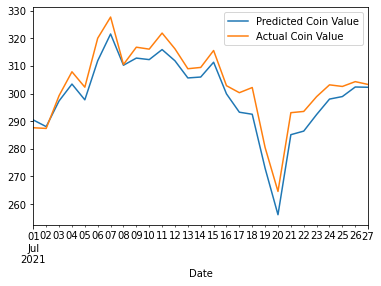